![](images/EscUpmPolit_p.gif "UPM")

# Kaggle Challenge
## Loan Approval Prediction - New York
El reto consiste en aplicar algoritmos de Machine Learning para predecir la emisión de créditos a un cliente en función de un dataset de entrada para el entrenamiento correspondiente.

El dataset está formado por los siguientes campos:

- id # Text # Identifier of the data instance
- LoanNr_ChkDgt # Text # Identifier of the loan petition
- Name # Text # Borrower name
- City # Text # Borrower city
- State # Text # Borrower state
- Bank # Text # Bank name
- BankState # Text # Bank state
- ApprovalDate # Date/Time # Date SBA commitment issued
- ApprovalFY # Text # Fiscal year of commitment
- NoEmp # Number # Number of business employees
- NewExist # Text # 1 = Existing business, 2 = New business
- CreateJob # Number # Number of jobs created
- RetainedJob # Number # Number of jobs retained
- FranchiseCode # Text # Franchise code, (00000 or 00001) = No franchise
- UrbanRural # Text # 1 = Urban, 2 = rural, 0 = undefined
- RevLineCr # Text # Revolving line of credit: Y = Yes, N = No
- LowDoc # Text # LowDoc Loan Program: Y = Yes, N = No
- DisbursementDate # Date/Time # Disbursement date
- DisbursementGross # Currency # Amount disbursed
- BalanceGross # Currency # Gross amount outstanding
- Accept # Text # Loan approval status. 0 = not approved, 1 = approved


## 1º Paso: Importar datos

In [51]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# Training and test spliting
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Estimators
from sklearn.svm import SVC

# Evaluation
from sklearn import metrics
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.naive_bayes import BernoulliNB, ComplementNB, MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Optimization
from sklearn.model_selection import GridSearchCV

# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)

original_data = pd.read_csv('data_reto_1/train.csv')
original_data

C:\Users\Usuario\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,LoanNr_ChkDgt,Name,City,State,Bank,BankState,ApprovalDate,ApprovalFY,NoEmp,...,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,Accept
0,b353a0b461c,3354343008,"TOGETHER GARGOYLES, INC.",BROOKLYN,NY,JPMORGAN CHASE BANK NATL ASSOC,NY,21-Dec-88,1989,20,...,0,0,0,0,N,N,30-Apr-89,"$350,000.00",$0.00,1
1,cca24bbcc48,2349745003,LAWRENCE K. ALTHISER DBA LARRY,HARTWICK,NY,CITIZENS BANK NATL ASSOC,RI,23-Mar-07,2007,3,...,1,4,0,2,N,N,30-Apr-07,"$35,000.00",$0.00,1
2,e60644381ce,6007284009,TAAMEER CONSTRUCTION INC,BROOKLYN (BOROUGH OF NEW YORK),NY,JPMORGAN CHASE BANK NATL ASSOC,IL,9-Jan-03,2003,5,...,0,5,1,1,0,N,31-Jan-03,"$50,000.00",$0.00,1
3,ffca41a2760,6047703002,"CENTRAL CONTROL SYSTEMS, INC.",SYRACUSE,NY,MANUFACTURERS & TRADERS TR CO,NY,10-Nov-93,1994,25,...,0,0,1,0,N,N,31-Jan-94,"$190,000.00",$0.00,1
4,79e48255003,6590164004,METRO SALON,ROCHESTER,NY,MANUFACTURERS & TRADERS TR CO,NY,14-Aug-03,2003,6,...,0,0,1,1,0,Y,30-Sep-03,"$30,000.00",$0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40380,8db591edafe,1238924005,"NBFD, INC.",OLEAN,NY,COMMUNITY BANK NATL ASSOC,NY,15-May-97,1997,25,...,0,0,1,0,N,Y,3-Jun-97,"$50,000.00",$0.00,1
40381,e1e96f4af51,3681885006,Altman Stage Lighting Co.,YONKERS,NY,EH NATIONAL BANK,CA,7-Oct-09,2010,100,...,10,100,0,1,N,N,7-Oct-09,"$1,666,600.00",$0.00,1
40382,29aabac46d9,1497375007,Paws & Claws Pet Boutique LLC,SEAFORD,NY,HSBC BK USA NATL ASSOC,NY,13-Oct-05,2006,1,...,0,1,0,1,N,N,30-Apr-06,"$25,000.00",$0.00,1
40383,2ed947e57f5,1757175003,Bay Medical Supplies Inc,BROOKLYN,NY,HSBC BK USA NATL ASSOC,NY,10-Apr-06,2006,1,...,0,1,0,1,Y,N,31-May-06,"$73,363.00",$0.00,1


In [52]:
original_data[['id', 'NoEmp', 'NewExist']]

,id,NoEmp,NewExist
0,b353a0b461c,20,1.0
1,cca24bbcc48,3,1.0
2,e60644381ce,5,1.0
3,ffca41a2760,25,1.0
4,79e48255003,6,1.0
...,...,...,...
40380,8db591edafe,25,2.0
40381,e1e96f4af51,100,1.0
40382,29aabac46d9,1,2.0
40383,2ed947e57f5,1,2.0


De acuerdo a los datos mostrados, se puede intuir que las variables asociadas a la prediccion del riesgo son:
- ApprovalDate y DisbursementDate, ambas determinan la fecha en que la SBA ha aceptado la solicitud y la fecha en que ha concedido el préstamo.
- NoEmp, la cantidad de empleados puede determinar que tan grande o pequeña es la empresa.
- NewExist, si es una empresa que recién esta empezando su actividad podría afectar la concesión del préstamo.
- CreateJob, si se han creado fuentes de empleo puede ser un indicador del crecimiento de la empresa.
- RetainedJob, representa la cantidad de empleos a tiempo completo existentes al momento de hacer la solicitud y que se mantendrán en caso de conseguir la aprobación.
- FranchiseCode ??
- RevLineCr, representa el hecho de que tan pronto como se pague la deuda, la empresa puede volver a pedir prestado hasta su límite de crédito sin pasar por otro proceso de aprobación de préstamo.
- LowDoc, de ser verdadero significa que el SBA promete un procesamiento rápido (para montos inferiores a $150,000).
- DisbursementGross, la cantidad que se esta solicitando es importante en conjunto con el resto de parámetros para poder determinar la aprobación del préstamo.
- Accept, el campo más importante porque indica si se ha cedido o no el préstamo.

##  2º Paso: Limpieza de datos

Se eliminarán campos irrelevantes o no necesarios. Para esto se debe analizar los datos numéricos, revisar si hay datos faltantes o nulos y completarlos, y eliminar columnas no necesarias. Luego hacer lo mismo con los no numéricos e incluso cambiar el tipo de dato si así se considera.

In [53]:
#Dataframe information from each column
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40385 entries, 0 to 40384
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 40385 non-null  object 
 1   LoanNr_ChkDgt      40385 non-null  int64  
 2   Name               40382 non-null  object 
 3   City               40385 non-null  object 
 4   State              40385 non-null  object 
 5   Bank               40340 non-null  object 
 6   BankState          40338 non-null  object 
 7   ApprovalDate       40385 non-null  object 
 8   ApprovalFY         40385 non-null  object 
 9   NoEmp              40385 non-null  int64  
 10  NewExist           40378 non-null  float64
 11  CreateJob          40385 non-null  int64  
 12  RetainedJob        40385 non-null  int64  
 13  FranchiseCode      40385 non-null  int64  
 14  UrbanRural         40385 non-null  int64  
 15  RevLineCr          40250 non-null  object 
 16  LowDoc             403

In [54]:
#Let's see if there's any duplicate
original_data.duplicated().any()

False

In [55]:
#statistics from numeric columns
original_data.describe()

,LoanNr_ChkDgt,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,Accept
count,4.038500e+04,40385.000000,40378.000000,40385.000000,40385.000000,40385.000000,40385.00000,40385.000000
mean,4.459565e+09,9.485750,1.279013,4.273666,7.128191,1218.894342,0.76885,0.796360
std,2.539048e+09,54.872591,0.451107,151.989529,152.156119,8647.991363,0.59020,0.402709
min,1.000655e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,2.276314e+09,2.000000,1.000000,0.000000,0.000000,0.000000,0.00000,1.000000
50%,3.804294e+09,4.000000,1.000000,0.000000,1.000000,1.000000,1.00000,1.000000
75%,6.409913e+09,9.000000,2.000000,1.000000,5.000000,1.000000,1.00000,1.000000
max,9.995413e+09,9999.000000,2.000000,8800.000000,8800.000000,91110.000000,2.00000,1.000000


In [56]:
#and null or missing values
original_data.isnull().sum()

id                     0
LoanNr_ChkDgt          0
Name                   3
City                   0
State                  0
Bank                  45
BankState             47
ApprovalDate           0
ApprovalFY             0
NoEmp                  0
NewExist               7
CreateJob              0
RetainedJob            0
FranchiseCode          0
UrbanRural             0
RevLineCr            135
LowDoc                55
DisbursementDate     131
DisbursementGross      0
BalanceGross           0
Accept                 0
dtype: int64

In [105]:
#Fill the missing numeric values with the most repeated
df = original_data.copy()
df.groupby('NewExist').size()

NewExist
0.0       47
1.0    29018
2.0    11313
dtype: int64

In [106]:
df['NewExist'] = df['NewExist'].fillna(1.0)
df['NewExist'].isnull().any()

False

Se elimina la columna LoanNr_ChkDgt porque es un identificador de la solicitud del préstamo y no aporta información relevante para determinar el riesgo.


In [107]:
df.drop(['LoanNr_ChkDgt'], axis=1, inplace=True)

Al revisar los datos no numéricos, se considera que las siguientes columnas no son consideradas como relevantes al momento de determinar el riesgo ya que aportan solamente información complementaria de la solicitud:
- Name
- City
- State
- Bank
- BankState
- ApprovalFY

Así mismo, para RevLineCr y LowDoc se va a reemplazar los nulos por el valor que más se repita.

In [108]:
df.drop(['Name', 'City', 'State', 'Bank', 'BankState', 'ApprovalFY'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40385 entries, 0 to 40384
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 40385 non-null  object 
 1   ApprovalDate       40385 non-null  object 
 2   NoEmp              40385 non-null  int64  
 3   NewExist           40385 non-null  float64
 4   CreateJob          40385 non-null  int64  
 5   RetainedJob        40385 non-null  int64  
 6   FranchiseCode      40385 non-null  int64  
 7   UrbanRural         40385 non-null  int64  
 8   RevLineCr          40250 non-null  object 
 9   LowDoc             40330 non-null  object 
 10  DisbursementDate   40254 non-null  object 
 11  DisbursementGross  40385 non-null  object 
 12  BalanceGross       40385 non-null  object 
 13  Accept             40385 non-null  int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 4.3+ MB


In [109]:
df.groupby('LowDoc').size()

LowDoc
0       13
A       11
C       16
N    36575
R        1
S       10
Y     3704
dtype: int64

In [110]:
df['LowDoc'].fillna('N', inplace=True)
df['LowDoc'].isnull().any()

False

In [111]:
df.groupby('RevLineCr').size()

RevLineCr
0     8671
N    17540
T      744
Y    13295
dtype: int64

In [112]:
df['RevLineCr'].fillna('N', inplace=True)
df['RevLineCr'].isnull().any()

False

In [113]:
#Let's see the column BalanceGross because it seems that it's not as relevant as it was thought
df.groupby('BalanceGross').size()

BalanceGross
$0.00     40385
dtype: int64

In [114]:
#So, let's drop it
df.drop(['BalanceGross'], axis=1, inplace=True)

Luego, convertimos el tipo de datos como se muestra a continuación:
- id, object -> string
- ApprovalDate y DisbursementDate, object -> string
- NewExists, float64 -> int64
- RevLineCr, object -> int64
- LowDoc, object -> int64
- DisbursementGross, object -> float64

In [115]:
df['id'] = df['id'].astype(str)

df['ApprovalDate'] = df['ApprovalDate'].astype(str)

df['DisbursementDate'] = df['DisbursementDate'].astype(str)

df.loc[df["RevLineCr"] == "N", "RevLineCr"] = 0
df.loc[df["RevLineCr"] == "0", "RevLineCr"] = 0
df.loc[df["RevLineCr"] == "T", "RevLineCr"] = 0
df.loc[df["RevLineCr"] == "Y", "RevLineCr"] = 1
df['RevLineCr'] = df['RevLineCr'].astype(int)

df.loc[df["LowDoc"] == "N", "LowDoc"] = 0
df.loc[df["LowDoc"] == "0", "LowDoc"] = 0
df.loc[df["LowDoc"] == "A", "LowDoc"] = 0
df.loc[df["LowDoc"] == "C", "LowDoc"] = 0
df.loc[df["LowDoc"] == "R", "LowDoc"] = 0
df.loc[df["LowDoc"] == "S", "LowDoc"] = 0
df.loc[df["LowDoc"] == "Y", "LowDoc"] = 0
df['LowDoc'] = df['LowDoc'].astype(int)

df["DisbursementGross"] = df["DisbursementGross"].astype(str)
df["DisbursementGross"] = df["DisbursementGross"].apply(lambda x: x[1:])
df["DisbursementGross"] = df["DisbursementGross"].replace({',':''}, regex=True)
#original_data.loc[original_data["DisbursementGross"] == "", "DisbursementGross"] = 0
#original_data.loc[original_data["DisbursementGross"] == " ", "DisbursementGross"] = 0
df["DisbursementGross"] = df["DisbursementGross"].astype(float)
#df["DisbursementGross"] = df["DisbursementGross"]/100000
#original_data = original_data.dropna()

In [116]:
df.info()
df.isnull().any()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40385 entries, 0 to 40384
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 40385 non-null  object 
 1   ApprovalDate       40385 non-null  object 
 2   NoEmp              40385 non-null  int64  
 3   NewExist           40385 non-null  float64
 4   CreateJob          40385 non-null  int64  
 5   RetainedJob        40385 non-null  int64  
 6   FranchiseCode      40385 non-null  int64  
 7   UrbanRural         40385 non-null  int64  
 8   RevLineCr          40385 non-null  int32  
 9   LowDoc             40385 non-null  int32  
 10  DisbursementDate   40385 non-null  object 
 11  DisbursementGross  40385 non-null  float64
 12  Accept             40385 non-null  int64  
dtypes: float64(2), int32(2), int64(6), object(3)
memory usage: 3.7+ MB


,id,ApprovalDate,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,Accept
0,b353a0b461c,21-Dec-88,20,1.0,0,0,0,0,0,0,30-Apr-89,350000.0,1
1,cca24bbcc48,23-Mar-07,3,1.0,1,4,0,2,0,0,30-Apr-07,35000.0,1
2,e60644381ce,9-Jan-03,5,1.0,0,5,1,1,0,0,31-Jan-03,50000.0,1
3,ffca41a2760,10-Nov-93,25,1.0,0,0,1,0,0,0,31-Jan-94,190000.0,1
4,79e48255003,14-Aug-03,6,1.0,0,0,1,1,0,0,30-Sep-03,30000.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40380,8db591edafe,15-May-97,25,2.0,0,0,1,0,0,0,3-Jun-97,50000.0,1
40381,e1e96f4af51,7-Oct-09,100,1.0,10,100,0,1,0,0,7-Oct-09,1666600.0,1
40382,29aabac46d9,13-Oct-05,1,2.0,0,1,0,1,0,0,30-Apr-06,25000.0,1
40383,2ed947e57f5,10-Apr-06,1,2.0,0,1,0,1,1,0,31-May-06,73363.0,1


In [117]:
df.describe()

,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,Accept
count,40385.000000,40385.000000,40385.000000,40385.000000,40385.000000,40385.00000,40385.000000,40385.0,4.038500e+04,40385.000000
mean,9.485750,1.278965,4.273666,7.128191,1218.894342,0.76885,0.329206,0.0,1.469873e+05,0.796360
std,54.872591,0.451083,151.989529,152.156119,8647.991363,0.59020,0.469931,0.0,2.181362e+05,0.402709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000e+00,0.000000
25%,2.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,3.500000e+04,1.000000
50%,4.000000,1.000000,0.000000,1.000000,1.000000,1.00000,0.000000,0.0,7.500000e+04,1.000000
75%,9.000000,2.000000,1.000000,5.000000,1.000000,1.00000,1.000000,0.0,1.550000e+05,1.000000
max,9999.000000,2.000000,8800.000000,8800.000000,91110.000000,2.00000,1.000000,0.0,5.000000e+06,1.000000


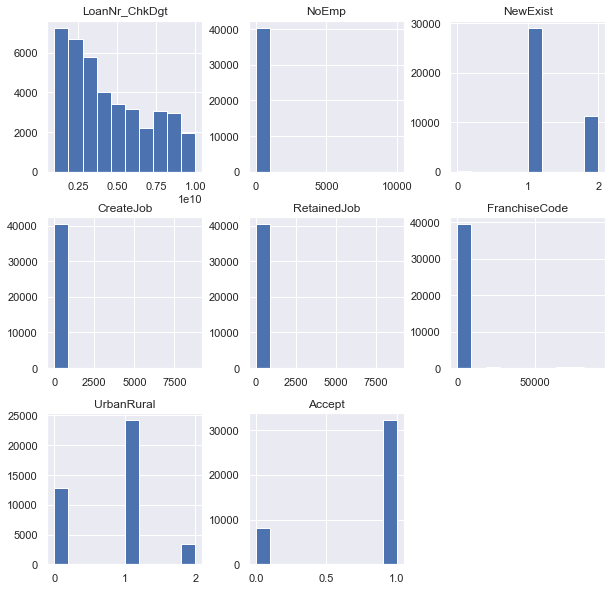

In [118]:
%matplotlib inline
original_data.hist(figsize=(10,10))
plt.show()

# 3º Paso: Algoritmo ML
El algoritmo secreto es bernoulli naive bayes

In [119]:
# Features of the model
features = ['NoEmp', 'NewExist', 'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr','LowDoc','DisbursementGross']
# Transform dataframe in numpy arrays
Z = original_data['id'].values
X = original_data[features].values
y = original_data['Accept'].values



# Test set will be the 7050 taken randomly
Z_train, Z_test, X_train, X_test, y_train, y_test = train_test_split(Z,X, y, test_size=7050, random_state=33)

Defino modelo

In [120]:

alpha = 3.0
binarize = 0.0 
fit_prior = True
class_prior = None
# Create BernoulliNB model
model = BernoulliNB()

In [121]:
#This step will take some time 


model.fit(X_train, y_train)

predicted = model.predict(X_test)
expected = y_test

In [122]:
# Accuracy
metrics.accuracy_score(expected, predicted)

0.744822695035461

In [123]:
# Confusion matrix
print(metrics.confusion_matrix(expected, predicted))

[[ 492  927]
 [ 872 4759]]


In [124]:
# Report
print(classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.36      0.35      0.35      1419
           1       0.84      0.85      0.84      5631

    accuracy                           0.74      7050
   macro avg       0.60      0.60      0.60      7050
weighted avg       0.74      0.74      0.74      7050



## 4ºEntrega

In [125]:
len(X_train)

33328

In [126]:
len(X_test)

7050

In [127]:
len(y_train)

33328

In [128]:
len(y_test)

7050

In [129]:
len(Z_test)

7050

In [138]:
Entrega = pd.DataFrame(data= {'Accept':y_test}  , index=Z_test )
#pd.DataFrame(data=[ y_test,Z_test ] )
#d = {'id': Z_test, 'Accept': y_test }
#Entrega = pd.DataFrame(data=d  )
Entrega

,Accept
fabbb1643af,1
8a6602a68eb,1
c55063a0008,0
4ca0127e366,1
f41e9c3cbb2,1
...,...
883a2cff012,1
7caff0d823d,1
17d0133aebc,1
f71ebf93f6a,1


In [134]:
Entrega.to_csv(r'C:\Users\José Manuel Rengifo\Documents\Universidad\MUIRST\Asignaturas\DATOS\sitc\submission.csv', index=True)